In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
X1 = np.array([-0.62231486, -0.96251306,  0.42269922, -1.452746, -0.66915783,
               -0.35716016,  0.49505163, -1.8117848,  0.53376487, -1.86923838,
               0.71434306, -0.4055084,  0.82887254,  0.81221287,  1.44280951,
               -0.45599278, -1.16715888,  1.08913131, -1.61470741,  1.61113001,
               -1.4532688,  1.04872588, -1.52312195, -1.62831727, -0.25191539])

X2 = np.array([-1.67427011, -1.81046748,  1.20384694, -0.41572751,  0.66851908,
               -1.75435288, -1.57532207, -1.22329618, -0.84375819,  0.52873296,
               -1.10837773,  0.04612922,  0.67696196,  0.84618152, -0.77362548,
               0.99153072,  1.7896494, -0.38343121, -0.21337742,  0.64754817,
               0.36719101,  0.23132427,  1.07029963,  1.62919909, -1.53920827])

Y = np.array([1, -1, -1, -1, -1,
              1, 1, -1, 1, -1,
              1, -1, 1, 1, 1,
              -1, -1, 1, -1, 1,
              -1, 1, -1, -1, 1])

xl1 = yl1 = -2.0
xl2 = yl2 = 2.0  

In [4]:
def plot_data(filename='data0'):
    fig = plt.figure()
    ax = fig.add_subplot(111)
    plt.scatter(X1[Y >= 0], X2[Y >= 0], s = 80, c = 'b', marker = "o")
    plt.scatter(X1[Y < 0], X2[Y < 0], s = 80, c = 'r', marker = "^")
    ax.set_xlim(xl1, xl2)
    ax.set_ylim(yl1, yl2)
    fig.set_size_inches(6, 6)
    plt.show() 

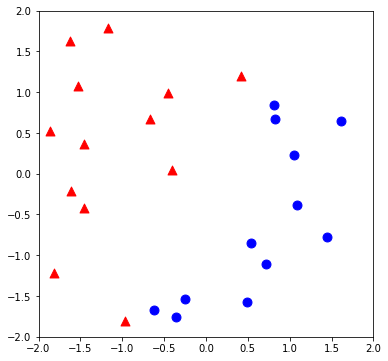

None


In [5]:
print(plot_data())

In [9]:
def plot_data_and_line(w1,w2):
    w1,w2 = float(w1),float(w2)
    if w2 != 0 :
        y1,y2 = (-w1*(xl1))/w2, (-w1*(xl2))/w2
        vx1,vy1 = [xl1,xl2,xl2,xl1,xl1], [y1,y2,yl2,yl2,y1]
        vx2,vy2 = [xl1,xl2,xl2,xl1,xl1], [y1,y2,yl1,yl1,y1]
    elif w1 != 0:
        vx1,vy1 = [xl2,0,0,xl2,xl2], [yl1,yl1,yl2,yl2,yl1]
        vx2,vy2 = [xl1,0,0,xl1,xl1], [yl1,yl1,yl2,yl2,yl1]
    else:
        print("ERROR, Invalid w1 and w2.")
        return;
    if  w2 > 0 or ( w2 == 0 and w1 > 0):
        c1,c2 = 'b','r'
    else:
        c1,c2 = 'r','b'
    fig = plt.figure()
    ax = fig.add_subplot(111)
    plt.scatter(X1[Y > 0], X2[Y > 0], s = 80, c = 'b', marker = "o")
    plt.scatter(X1[Y<= 0], X2[Y<= 0], s = 80, c = 'r', marker = "^")
    plt.fill(vx1, vy1, c1, alpha = 0.25)
    plt.fill(vx2, vy2, c2, alpha = 0.25)
    ax.set_title(("w1 = %s, w2 = %s")%( w1, w2))
    ax.set_xlim(xl1, xl2)
    ax.set_ylim(yl1, yl2)
    fig.set_size_inches(6, 6)
    plt.show()

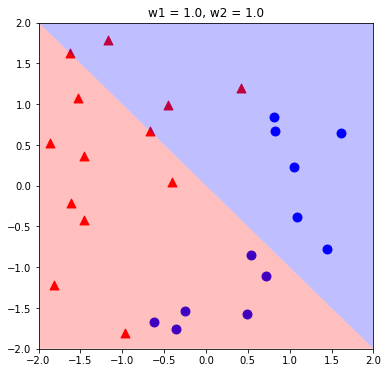

In [10]:
plot_data_and_line(1,1)

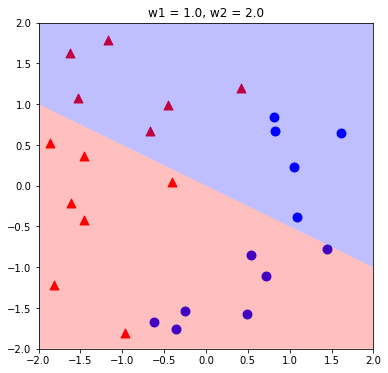

In [11]:
plot_data_and_line(1,2)

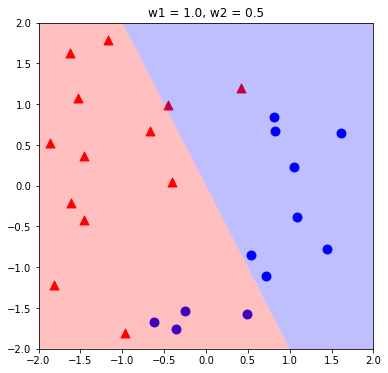

In [13]:
plot_data_and_line(1,0.5)

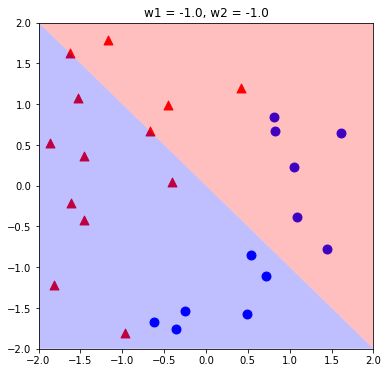

In [15]:
plot_data_and_line(-1,-1)

In [19]:
def learn_perceptron(times=1000):
    w1,w2 = 1,1
    for i in range(times):
        ERR = (w1*X1+w2*X2) * Y < 0
        if len(list(filter(bool,ERR))) > 0:
           err_x1,err_x2,err_y = X1[ERR][0],X2[ERR][0],Y[ERR][0]
           w1,w2 = (w1+err_y*err_x1),(w2+err_y*err_x2)
        else: 
           print("Complete!")
           break;
    plot_data_and_line(w1,w2)

Complete!


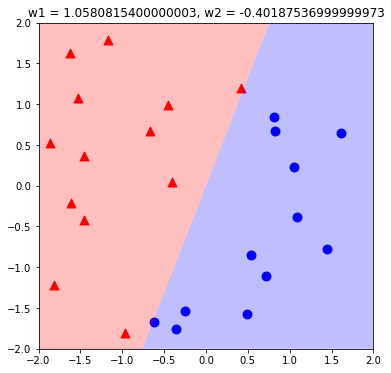

In [20]:
learn_perceptron()

In [24]:
def learn_and_plot():
    w1,w2 = 1.,1.
    plt.ion()
    fig = plt.figure()
    plt.show()
    complete=False
    i=0
    while True:
        plt.clf()
        ax = fig.add_subplot(111)
        ERR = (w1*X1+w2*X2) * Y < 0
        if i > 0 and (not complete):
            pwa1,pwa2 = pw1+err_y*err_x1,pw2+err_y*err_x2
            if err_y >=0:
                eva1,eva2=[err_x1,pwa1], [err_x2,pwa2]
                ac='b'
            else: 
                eva1,eva2=[err_x1,pw1], [err_x2,pw2]
                ac='r'
            evb1,evb2=[pwa1,pw1], [pwa2,pw2]
            ax.arrow(0, 0, err_x1, err_x2, head_width=0.05, alpha=0.5, fc=ac, ec=ac )
            ax.arrow(0, 0, pw1, pw2, head_width=0.05, alpha=0.5, fc='b', ec='b')
            ax.arrow(0, 0, pwa1, pwa2, head_width=0.05, alpha=0.5, fc='b', ec='b')
            plt.text(err_x1/2., err_x2/2., 'X', color='k', size=20, fontweight='bold')
            plt.text(pw1/2., pw2/2., 'W', color='k', size=20, fontweight='bold')
            plt.text(pwa1/2., pwa2/2.,'W+yX', color='k', size=20, fontweight='bold')
            plt.plot(eva1, eva2, alpha=0.3, color='k')
            plt.plot(evb1, evb2, alpha=0.3, color='k')
            plt.plot([xl1,xl2],[y1,y2],alpha=0.2, color='b')
            plt.fill(pvx1, pvy1, c1, alpha = 0.1)
            plt.fill(pvx2, pvy2, c2, alpha = 0.1)
        if w2 != 0 :
            y1,y2 = (-w1*(xl1))/w2, (-w1*(xl2))/w2
            vx1,vy1 = [xl1,xl2,xl2,xl1,xl1], [y1,y2,yl2,yl2,y1]
            vx2,vy2 = [xl1,xl2,xl2,xl1,xl1], [y1,y2,yl1,yl1,y1]
        elif w1 != 0:
            vx1,vy1 = [xl2,0,0,xl2,xl2], [yl1,yl1,yl2,yl2,yl1]
            vx2,vy2 = [xl1,0,0,xl1,xl1], [yl1,yl1,yl2,yl2,yl1]
        else:
            print("ERROR, Invalid w1 and w2.")
            return;
        if  w2 > 0 or (w2 == 0 and w1 > 0):
            c1,c2 = 'b','r'
        else:        
            c1,c2 = 'r','b'
        plt.scatter(X1[Y > 0], X2[Y > 0], s = 80, c = 'b', marker = "o")
        plt.scatter(X1[Y<= 0], X2[Y<= 0], s = 80, c = 'r', marker = "^")
        ax.set_title( ("Iteration:%s, w1 = %.5f, w2 = %.5f")%(i, w1, w2) )
        ax.set_xlim(xl1, xl2)
        ax.set_ylim(yl1, yl2)
        if not complete:
            plt.show()
            fig.set_size_inches(6, 6)
            raw_input("Please press ENTER to update the result of iteration.")
        plt.fill(vx1, vy1, c1, alpha = 0.4)
        plt.fill(vx2, vy2, c2, alpha = 0.4)
        pw1,pw2,pvx1,pvy1,pvx2,pvy2 = w1,w2,vx1,vy1,vx2,vy2
        #----Perceptron Algorithm-------# 

        ERR = (w1*X1+w2*X2) * Y < 0
        if len(list(filter(bool,ERR))) > 0:
           err_x1,err_x2,err_y = X1[ERR][0],X2[ERR][0],Y[ERR][0]
           w1,w2 = (w1+err_y*err_x1),(w2+err_y*err_x2)
        else:
           if complete:
               ax.set_title(("Complete! Iteration:%s, w1 = %.5f, w2 = %.5f")%(i-1, w1, w2))
               plt.show()
               fig.set_size_inches(6, 6)
               print("Complete!")
               break 
           else:
              complete=True
        #-----------------------#

        plt.show()
        fig.set_size_inches(6, 6)
        i=i+1
        input("Please press ENTER to start the next iteration.")

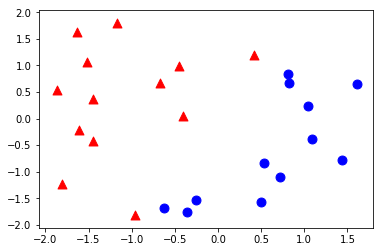

NameError: name 'raw_input' is not defined

In [25]:
learn_and_plot()